<a href="https://colab.research.google.com/github/maiali13/ML-Cookbook/blob/master/DBSCAN_Recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CS Build Week 1 

[Assignment Repo](https://github.com/LambdaSchool/CS-Data-Science-Build-Week-1)

[Project Repo](https://github.com/maiali13/ML-Cookbook)

## Imports

In [1]:
# DBSCAN from scratch
import pandas as pd
import numpy as np
import math

# for testing alg
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn import datasets

## DBSCAN from Scratch


**Density-Based Spatial Clustering of Applications with Noise**

Lucky for me, [wiki](https://en.wikipedia.org/wiki/DBSCAN) has a very nice pseudocode breakdown of this algorithm already. I am going to follow the framework and labeling of the DBSCAN alg in the official SK-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). I will also follow SK-learn's recommendations on default settings for parameters. 



In [2]:
# initialize class

class xDBSCAN:
  """
  Density-Based Spatial Clustering of Applications with Noise
  -----------------------------------------------------------
  a clustering method for unsupervised learning
  
  Parameters
  ----------
  eps: (float, default=0.5) 
    the distance threshold between two points in the same neighborhood

  min_samples: (int, default=5)
    the number of samples within a point's nighborhood required for it to be
    weighted as a core point for clustering

  (these two parameters determine cluster density)

  """
  def __init__(self, eps=0.5, min_samples=5):
    self.eps = eps
    self.min_samples = min_samples
    # self.data = None #the dataset
    self.clusters = [] # list of cluster arrays containing point indeces
    self.neighbors = {} # hash dict of {"point": [neighbor1, neighbor2, ...]}

  def get_neighbors(self, X, y):
    """
    finds a point's epsilon neighbors via calculating euclidian distance between points
    returns a list of all neighboring points
    """
    neighbors = np.where(np.linalg.norm(X[y] - X, axis=1) < self.eps)[0]
    return np.array(neighbors) #might need to remove np.array and just return neigbors

  def fit(self, X):
    """
    perform clustering on the dataset
    returns self
    
    Parameters
    ----------
    X: (array or array-like)
      feature array of points to cluster

    """
    C = 0 # cluster counter C
    n_points = len(X) # number of data points
    self.clabels = np.zeros(n_points, dtype=int) # define empty label list
        
    for y in range(n_points): #for each point in our input data, do the following:
        if self.clabels[y] != 0: # if it alraedy has a labl, skip
              continue
            
        neighbors = self.get_neighbors(X, y) #find neighbors 

        if len(neighbors) < self.min_samples: # if the number of neighboring points is less than min_samples (aka not densley surrounded)
            self.clabels[y] = -1 # label that point as noise 
            continue

        
        # when data point isnt noise  
        C += 1 # move onto the next cluster label
        self.clabels[y] = C # assign new cluster label

        i = 0 
        while i < len(neighbors):

          neighbor_y = int(neighbors[i]) # creating a new cluster

          if self.clabels[neighbor_y] == -1: # label new sparse points as noise
            self.clabels[neighbor_y] = C
                
          elif self.clabels[neighbor_y] == 0: # skip if already labelled/processed
            self.clabels[neighbor_y] = C
            new_neighbors = self.get_neighbors(X, neighbor_y) # get neighbors of point
                    
            if len(new_neighbors) >= self.min_samples:  # if the number of neighboring points is higher than min_samples (aka densley surrounded)
              neighbors = np.append(neighbors, new_neighbors) # add the newly found neighbors 

          i += 1 # iterate on for all unlabelled points



## Testing & Graphs

going to test on toy data from SK-Learn


In [19]:
# imported data for graphing - SK Learn

samples = 1200

# moons
parabolas = datasets.make_moons(n_samples= samples, noise=0.055)

#circles
circles = datasets.make_circles(n_samples= samples, factor=0.5, noise=0.055)

In [104]:
skl_datasets = [parabolas, circles]

def plot_skl(skl_datasets):
  plt.figure(figsize=(20,25))
  plot_num = 1
  for i, skl_datasets in enumerate(skl_datasets):
    X, y = skl_datasets
    plt.subplot(len(skl_datasets),len(skl_datasets), i+1)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')

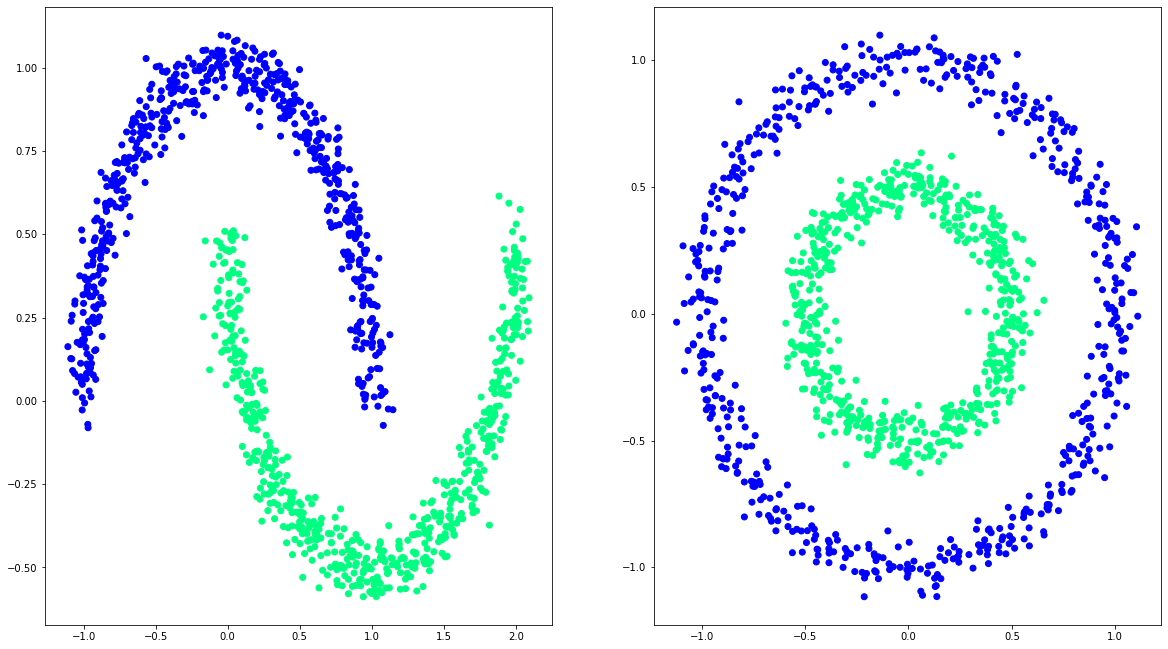

In [105]:
plot_skl(skl_datasets)

In [34]:
# DBSCAN from scratch on the test data
test = []

for dataset in skl_datasets:
    X, _ = dataset
    test_ = xDBSCAN(eps=0.1, min_samples=5)
    test_.fit(X)
    labels = test_.clabels
    test.append((X, labels))

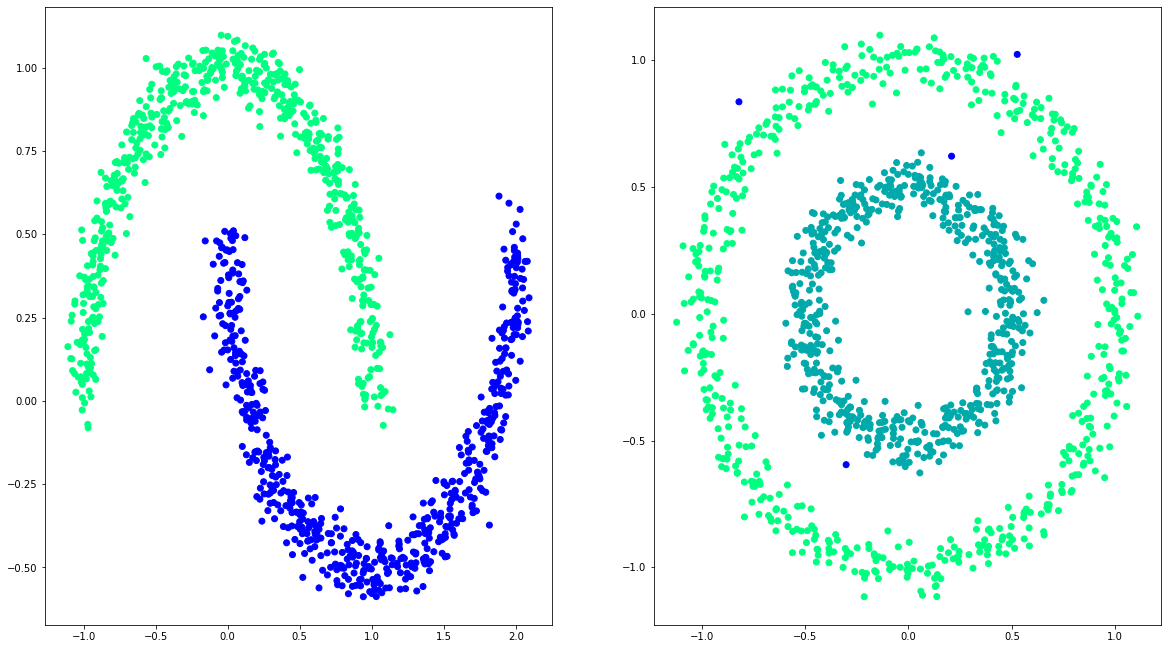

In [35]:
plot_skl(test)

In [43]:
# SK-Learn's DBSCAN on the test data
from sklearn.cluster import DBSCAN

last_datasets = []

for dataset in skl_datasets:
    X, _ = dataset
    db = DBSCAN(eps=0.1, min_samples=5)
    db.fit(X)
    labels = db.labels_
    last_datasets.append((X, labels))

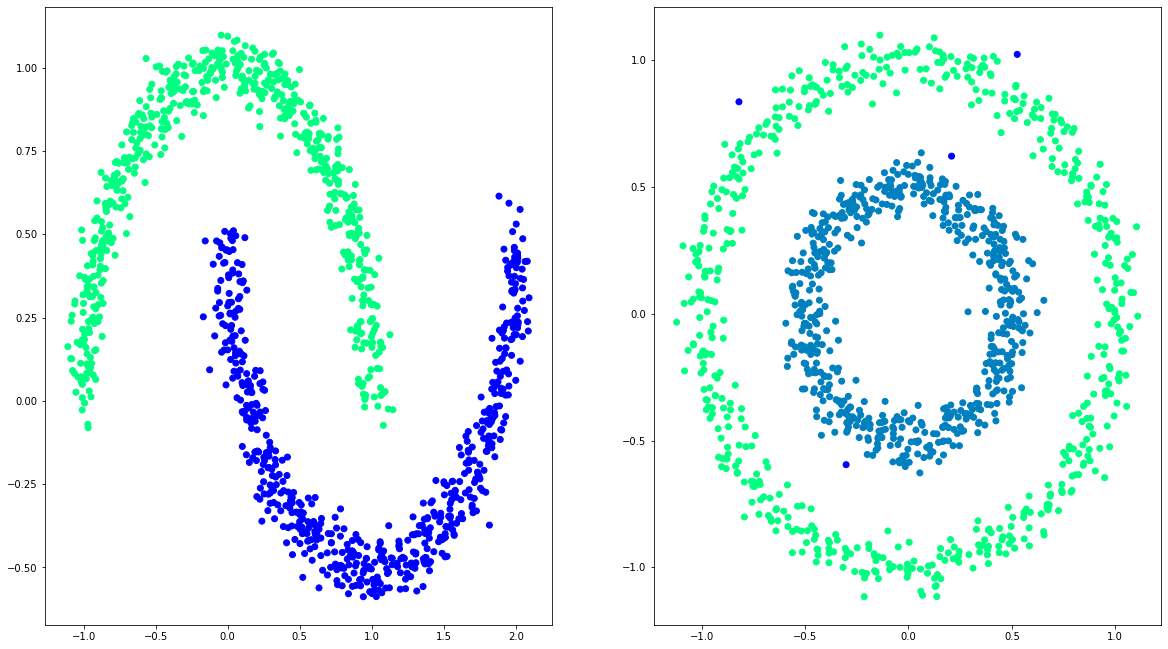

In [44]:
plot_skl(last_datasets)

In [95]:
# more imported datasets

# blobs
np.random.seed(42)
blobs = datasets.make_blobs(n_samples= 1000, random_state=42)

# uneven
uneven = datasets.make_blobs(n_samples= 1000, cluster_std=[1.0, 2, 0.5], random_state=42)

# crowd
centers = [[1, 1], [-1, -1], [1, -1]]
crowd = datasets.make_blobs(n_samples= 1300, centers=centers, cluster_std=0.5, random_state=45)

In [161]:
blob_datasets = [blobs, uneven]

def plot_skl2(blob_datasets):
  plt.figure(figsize=(20,25))
  plot_num = 1
  for i, blob_datasets in enumerate(blob_datasets):
    X, y = blob_datasets
    plt.subplot(len(blob_datasets),len(blob_datasets), i+1)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='cool', linewidth=2) #, edgecolor='white'

In [151]:
# DBSCAN from scratch on the test data, blobs
blobtest = []

for dataset in blob_datasets:
    X, _ = dataset
    test_ = xDBSCAN(eps=0.6, min_samples=9)
    test_.fit(X)
    labels = test_.clabels
    blobtest.append((X, labels))

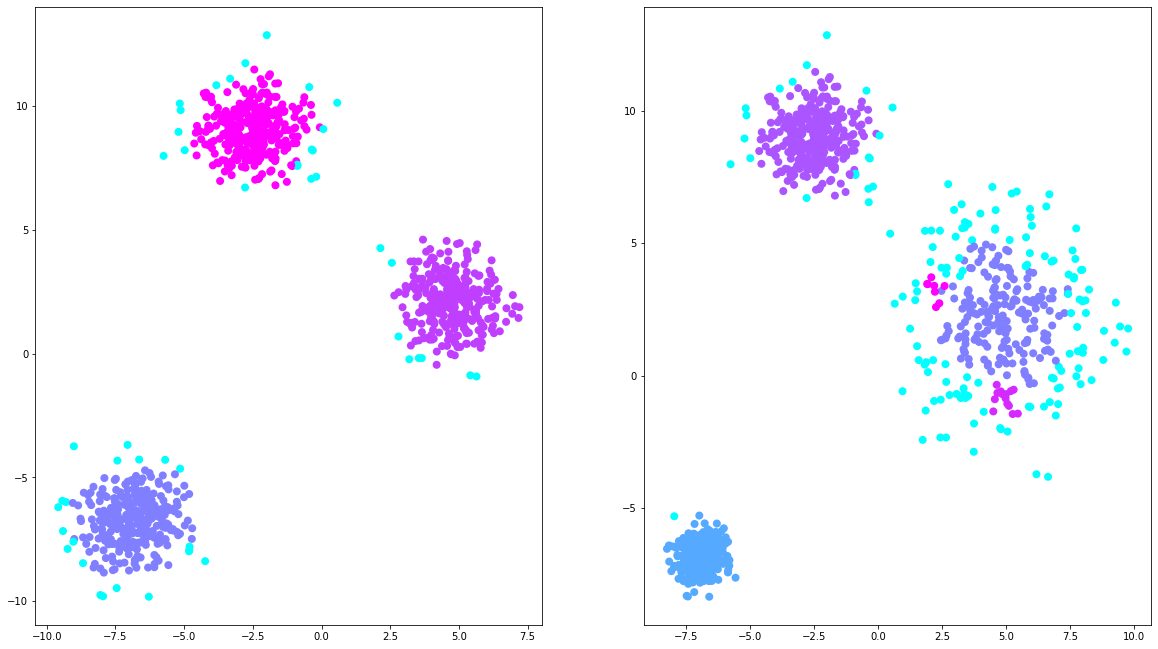

In [162]:
plot_skl2(blobtest)

In [139]:
# SK-Learn's DBSCAN on the blobs
blobtest1 = []

for dataset in blob_datasets:
    X, _ = dataset
    db = DBSCAN(eps=0.6, min_samples=9)
    db.fit(X)
    labels = db.labels_
    blobtest1.append((X, labels))

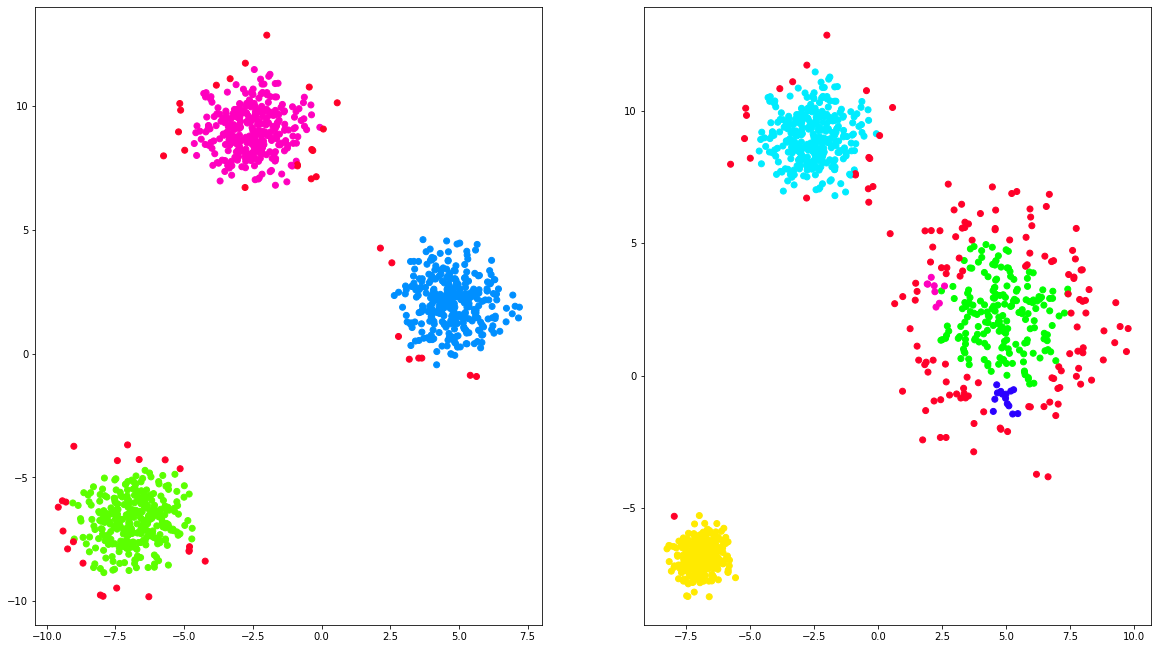

In [140]:
plot_skl2(blobtest1)

### Comparing DBSCAN to K-Means

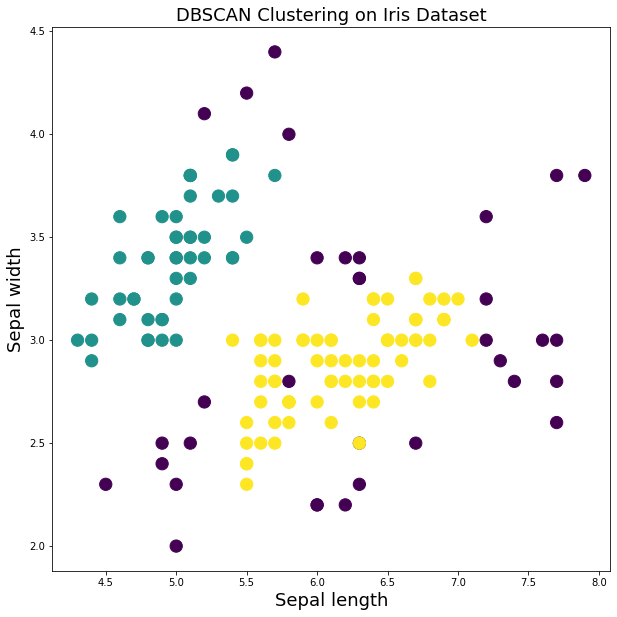

In [10]:
# imported data for graphing - UCI Iris
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
UCI = iris.data; data = pd.DataFrame(UCI)
cor = data.corr()

# standarize features
scaler = StandardScaler()
UCI_std = scaler.fit_transform(UCI)

# Conduct DBSCAN Clustering (SKLEARN)
clt = DBSCAN()
    
# Train model
model = clt.fit(UCI_std)

# Predict clusters
clusters = pd.DataFrame(model.fit_predict(UCI_std))
data['Cluster'] = clusters

# Visualise cluster membership
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(data[0],data[1], c=data['Cluster'], s=150)
ax.set_title('DBSCAN Clustering on Iris Dataset', fontsize=18)
ax.set_xlabel('Sepal length', fontsize=18)
ax.set_ylabel('Sepal width', fontsize=18)
plt.show()

In [11]:
from sklearn.cluster import KMeans

X = iris.data[:, :2]
y = iris.target

# fitting K-Means on Irises

km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

NameError: ignored

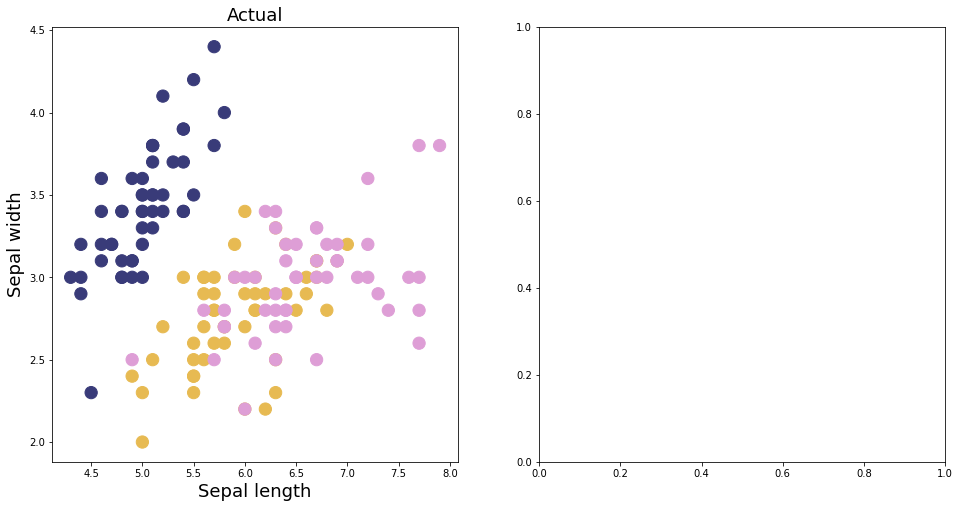

In [12]:
# actual data vs kmeans
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='tab20b', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='tab20b',s=150)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].set_title('K-Means', fontsize=18)

In [ ]:
# actual data vs K-Means vs DBSCAN
fig, axes = plt.subplots(1, 3, figsize=(25,10))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='tab20b', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].set_title('Actual', fontsize=20)

axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='tab20b',s=150)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].set_title('K-Means', fontsize=20)

axes[2].scatter(data[0],data[1], c=data['Cluster'], cmap='tab20b', s=150)
axes[2].set_xlabel('Sepal length', fontsize=18)
axes[2].set_ylabel('Sepal width', fontsize=18)
axes[2].set_title('DBSCAN', fontsize=20)

In [ ]:

from sklearn.preprocessing import StandardScaler

KM = []

for dataset in skl_datasets:
    X, _ = dataset
    db = DBSCAN(eps=0.1, min_samples=5)
    db.fit(X)
    labels = db.labels_
    KM.append((X, labels))
